In [3]:
class Agent:
    def __init__(self,pg):
        self.pg = pg
    def tick(self, head_position, tails, target, target_points):
        keys = [False]*512
        return keys
        


In [4]:
class RandomAgent(Agent): 
    def tick(self, head_position, tails, target, target_points):
        keys = [False]*512
        if rnd.randint(0,100) <30:
            keys[rnd.choice([pygame.K_w,pygame.K_a,pygame.K_s,pygame.K_d])] = True
        return keys
    
            


In [ ]:
!pip install pygame
pip install  Pyarrow 
!pip install pandas
pip install tqdm
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\data\HiDrive\Data\uni\dl\code\ml\Scripts\python.exe -m pip install --upgrade pip' command.


# PyGame Snake

## Einführung
Das klassische Spiel "Snake" ist ein einfaches Videospiel, welches auf Personal-Computern zuerst im Jahr 1978 von  Peter Trefonas unter dem Namen "Worm" auf dem TRS-80 implementiert wurde [1]. Seitdem hat es zahlreiche Iterationen und Variationen erfahren. Das Spielprinzip ist einfach, aber mit fortschreitender Spieldauer immer anspruchsvoller. Aufgrund seiner hohen bekanntheit (früher und heute) kann es als zeitloser Klassiker bezeichnet werden.

### Spielprinzip
Das Hauptziel des Spiels besteht darin, eine Schlange durch ein begrenztes Spielfeld zu steuern und dabei so viele Nahrungsmittel wie möglich zu fressen. Mit jedem verzehrten Nahrungsmittel wächst die Schlange, was das Spiel den Schwierigkeitsgrad kontinuirlich erhöht. Eine Berührung einer der Wände oder des Körpers der Schlange führt zum Spielende.

### Herausforderungen
Der Spieler benötigt Geschicklichkeit und strategisches Denken, um optimale Entscheidungen in Echtzeit zu treffen. Es muss vorrausschauend geplant werden, um die Schlange sicher durch das Spielfeld zu führen und gleichzeitig die wachsende Länge der Schlange beachtet werden.

### Ziel der Untersuchung
Im folgenden werden verschiedene KI Modelle darauf trainiert, das Spiel Snake zu meistern. Der Fokus liegt auf der Anwendung verschiedener Deep Learning-Verfahren, um die Leistung der KI-Modelle zu vergleichen. Diese Modelle werden darauf trainiert, intelligente Entscheidungen zu treffen, um die Schlange effektiv zu steuern und dabei möglichst viele Nahrungsmittel zu fressen. 

Außerdem soll untersucht werden, wie einfach fertig trainierte Modelle an geänderte Spielregeln angepasst werden können. Dabei sollen die Modelle zunächst auf das klassiche Spiel Snake trainiert werden und danach auf Varianten von Snake mit geänderten Regeln angwandt werden. Folgende Regelanpassungen sind vorgesehen:
- Weitere Hindernisse auf dem Spielfeld
- Nahrungsmittel mit Verschiedenen Punktzahlen, die gleichzeitig erscheinen
- Maximale Dauer zwischen zwei Nahrungsaufnahmen
- Keine Wände am Bildschirmrand

Der Vergleich der verschiedenen Ansätze ermöglicht Einblicke in die Wirksamkeit unterschiedlicher Deep Learning-Techniken bei der Bewältigung von komplexen Aufgaben und deren Adaptionsfähigkeit auf geänderte Problemstellungen.

## Verfahren
In der Arbeit werden die folgenden drei Verfahren untersucht. Sie werden im Folgenden kurz vorgestellt.  
Einige Verfahren nutzen sogenannte Agenten. Das bedeutet, dass das jeweilige Verfahren auf das gestellte Problem angewendet wird.
### Deep Q-Networks/Deep Q-Learning
Deep Q-Learning (DQL) ist eine Methode, die auf künstlichen neuronalen Netzwerken basiert und dazu dient, komplexe Entscheidungsprozesse zu erlernen. Dabei werden tiefe neuronale Netzwerke mit dem sogenanten Q-Learning, einer Methode des verstärkenden lernens, kombiniert.
> "Q-Learning ist eine Form des zeitlichen Differenzlernens. Als solches ist es eine modellfreie Verstärkungslernmethode, die Elemente der dynamischen Programmierung mit Monte-Carlo-Schätzungen kombiniert. Unter anderem aufgrund des Beweises von Watkins (1989), dass es zur optimalen Wertfunktion konvergiert, gehört das Q-Learning zu den am häufigsten verwendeten und bekanntesten Verstärkungslernalgorithmen." [2, S. 1033]  


Der Kern des Q-Learning ist die Aktionswert-Funktion Q(s,a). Diese Funktion gibt den Ertrag für eine Aktion a aus, die von einem Agenten im Zustand s ausgeführt wird [3]. Dabei erfolgt die Auswahl der nächsten Aktion durch eine Policy [4, S. 121]. Beispiele hierfür sind deterministische Policies, die bei einem gegebenen Zustand immer dieselbe Aktion ausführen, [4, S.410]  oder Policies, die auf einer Wahrscheinlichkeitsverteilung basieren und bei gleichem Zustand zu unterschiedlichen Aktionen führen können [4, S.419]. 


Die Ergebnisse der Aktionswert-Funktion werden in der Q-Tabelle gespeichert.
Der gesamte Algorithmus lässt sich wie folgt beschreiben:
1. Die Q-Tabelle wird mit zufälligen Werten (oder nullen) initialisiert.
2. Der Agent interagiert mit der Umgebung und erhält das Tuple (s,a,r,s')
Zustand (s), Aktion (a), Ertrag (r), Folgezustand (s'). Dabei wird auch die Entscheidung getroffen, welche Aktion als nächstes durchgeführt wird. Diese Entscheidungsfindung ist ein Dilemma zwischen Erkundung und Ausbeutung (exploration and exploitation)[4, S. 127] und lässt sich nicht eindeutig lösen und wird durch die gewählte Policy bestimmt. 
3. Der Ertrag wird in die Q-Tabelle aufgenommen. Dieser errechnet sich wie folgt:  
$Q(s,a) = r + \gamma$  $max_{a' \in A}(Q(s',a'))$  
wobei A die Menge aller Aktionen und  
$\gamma$ der Discount-Faktor ist, welcher bestimmt, wie stark zukünftige Erträge berücksichtigt werden sollen.
4. Schritte zwei und drei wiederholen.  
[4, S.121]

Angewendet auf die Aufgabenstellung ergibt sich jedoch das Problem, dass die Tabelle sehr schnell sehr groß wird. Ein Feld der Größe 32*32 bietet 1024 Mögliche Positionen für den Kopf der Schlange und 1024 Positionen für die Nahrung. Insgesamt ergibt das 1.048.576 Kombinationen von Kopf und Nahrung. Dabei wird der wachsende Schlangenkörper nicht berücksichtigt.

Da die Berechnung aller Permutationen nicht effizient möglich ist, stellt sich die Frage, wie der Agent effektiv mit dem Spiel interagieren kann. Eine naheliegende Möglichkeit besteht darin, zufällige Aktionen (Explore) auszuführen, um die Q-Tabelle zu füllen. Allerdings können rein zufällige Bewegungen das Spiel nicht lösen. Ein Möglichkeit ist die epsilon-greedy-Methode [4, S.127]. Diese kann sowohl zufällige- als auch Policy-Aktionen durchführen. Die Wahrscheinlichkeit einer der beiden Aktionen wird durch einen Hyperparameter $\epsilon$ gesteuert. Dieser gibt an, mit welcher Wahrscheinlichkeit die Zufallsaktion gewählt wird [4, S.127]. Typischerweise ist er zu Beginn 1.0 und sinkt im Laufe des Trainings auf einen Wert zwischen 0.05 und 0.02 [4, S.127].  

Zur Approximation der Q-Funktion mit einem Neuronalen Netz werden Trainingsdaten benötigt. Diese müssen unabhängig und gleichverteilt sein [4, S.128]. Selbst wenn diese aus zufällig erzeugten Bewegungen generiert werden, ist dies für die gegebene Aufgabe nicht der Fall. Nach einer einzelnen Aktion verändert sich die Gesamtsituation nur geringfügig. Um dieses Problem zu lösen wird ein Replay-Buffer eingesetzt [4, S.128]. Dieser wird mit Werten gefüllt und dann werden zufällige Daten für das Training entnommen. Um sicherzustellen, dass die Daten noch relevant sind, hat der Puffer nur eine begrnzte größe, sodass alte Daten von neuen verdrängt werden [4, S.128].  

Die geringe Unabhängigkeit und Gleichverteilung der Daten führt zu einem weiteren Problem. Der Wert für $Q(s,a)$ wird durch die Formel $r + \gamma$  $max_{a' \in A}(Q(s',a'))$ bestimmt. Allerdings unterscheiden sich, wie schon erwähnt, die Zustände s und s' nur geringfügig. Dies kann dazu führen, dass das Training instabil wird [4, S.128]. Um dies zu vermeiden wird ein Kopie des eigentlich Q-Netzwerks verwendet, um den Zielwert für das Training zu schätzen. Die Gewichte des Target-Netzwerks werden dann in regelmäßigen (aber ausreichend großen) Abständen aus dem eigentlich Q-Netzwerk kopiert. Ein typsicher Wert wäre etwa alle 1000 Iterationen bei einer Gesamtsumme von 10.000 Iterationen [4, S.128].

 
### Reinforcement Learning 
### Deep Policy Networks

\gamma

## Implementierung und Vorgehen
Das eigentliche Spiel ist als Klasse implementiert, so dass mehrere Ausführungen gleichzeitig möglich sind. Die Darstellung des Spiels erfolgt mit dem PyGame Framwork[99]. Für eine effiziente Berechung während des Trainings eines Machine Learning Modells muss das Rendering jedoch abschaltbar sein. Außerdem ist es notwendig, dass das Spiel mit hoher Geschwindigkeit läuft. Auch dies ist für ein effektives Training notwendig und möglich, da ein Computer nicht den gleichen Einschränkungen der Reaktionszeit unterliegt wie ein Mensch.


In [1]:
import time
import math
import random as rnd
import threading
from tqdm import tqdm
import pygame


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
BLACK = (0, 0, 0)
WHITE = (200, 200, 200)
RED = (255,0,0)
YELLOW = (255, 255, 0)
class SnakeView():

    def __init__(self,snake_game,screen_width=1024,screen_height=768,block_size=20,):
        pygame.init()
        self.screen_width = screen_width
        self.screen_height = screen_height
        self.block_size =20
        self.screen = pygame.display.set_mode((self.screen_width, self.screen_height))
        self.snake = None
        self.fruit = None
        self.snake_game=snake_game
    def draw_grid(self):
        clock =  pygame.time.Clock()
        while True:
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    return
            for x in range(0,self.screen_width,self.block_size):
                for y in range(0, self.screen_height, self.block_size):
                    _x = x//self.block_size
                    _y = y//self.block_size
                    
                    rct = pygame.Rect(x,y,self.block_size,self.block_size)
                    if (_x,_y) in self.snake:
                        pygame.draw.rect(self.screen,YELLOW,rct)
                        
                    elif (_x,_y) == self.fruit:
                        pygame.draw.rect(self.screen,RED,rct)
                    else:    
                        pygame.draw.rect(self.screen,WHITE,rct)

            keys = pygame.key.get_pressed()
    
            if keys[pygame.K_w]:
                self.snake_game.keys[0]=1
            elif keys[pygame.K_a]:
                self.snake_game.keys[1]=1
            elif keys[pygame.K_s]:
                self.snake_game.keys[2]=1
            elif keys[pygame.K_d]:
                self.snake_game.keys[3]=1

            pygame.display.flip()
            #dt = clock.tick(60)/(100)
            pygame.time.delay(10)
    def update(self,snake,fruit,game_over):
        self.snake=snake
        self.fruit=fruit
        

In [4]:
class SnakeGame():
    def __init__(self,screen_width=1024,screen_height=768,speed_factor=2,debug=False,point_config = (1,1,-1,-1)):
        self.debug=debug
        self.screen_width = screen_width
        self.screen_height = screen_height
        self.speed_factor = speed_factor
        self.block_size =20
        self.points = 0
        self.snake = [(screen_width // (2*self.block_size), screen_height // (2*self.block_size))]
        self.fruit = self.fruit_position()
        self.snake_direction = (1,0)
        self.keys = [0,0,0,0]   #W,A,S,D
        self.dir_list = [(0,-1),(-1,0),(0,1),(1,0)]
        self.boarder_right = self.screen_width // self.block_size
        self.boarder_bottom = self.screen_height // self.block_size
        self.observer = []
        self.game_over_timer =50
        self.no_action_flag =False
        self.point_config = point_config
    def fruit_position(self):
        fp=-99
        while(fp in self.snake or fp ==-99 or fp == self.fruit_position):
            fp = rnd.randint(0,self.screen_width // (2*self.block_size)), rnd.randint(0,self.screen_height // (2*self.block_size))
        if self.debug:
            print("fruit",fp, self.snake,fp in self.snake)
        return (fp)

    def check_180_turn(self,a,b):
        return(-a[0] ==b[0] and -a[1] ==b[1])
    
    def tick(self):
        self.game_over_timer-=1
        self.no_action_flag=False
        if self.game_over_timer<=0:
            return True

        for i in range(0,len(self.keys)):
            if self.keys[i]:
                if len(self.snake)== 1 or not self.check_180_turn(self.snake_direction,self.dir_list[i]):
                    self.snake_direction = self.dir_list[i]
                else:
                    self.no_action_flag=True
                break

        head = self.snake[0]
        head_new = (head[0]+self.snake_direction[0],head[1]+self.snake_direction[1])

        #print("aaa",head_new,self.boarder_right,head_new[0] ==self.boarder_right)
        #Kollision
        if (head_new in self.snake[1:] or 
            head_new[0] < 0 or head_new[0] == self.boarder_right or 
            head_new[1] < 0 or head_new[1] == self.boarder_bottom):
            if self.debug:
                print("kollision mit schlange",self.snake,self.fruit)
            return True
        
        self.snake.insert(0,head_new )
        if self.debug:
            print("dst", self.get_distance(head_new,self.fruit))
        new_fruit =False
        if head_new == self.fruit:
            if self.debug:
                print("MATCH")
            self.points+=1
            self.fruit = self.fruit_position()
            self.game_over_timer = 20*len(self.snake)
        else:
            self.snake.pop()
        
            
            
        #if self.debug:
         #   print("TTTTkollision mit schlange",self.snake,self.fruit,self.fruit in self.snake)
        self.keys = [0,0,0,0]
        return False
    def register_observer(self,observer):
        self.observer.append(observer)
        
    def notify(self,game_over):
        for o in self.observer:
            o.update(self.snake, self.fruit,game_over)

    def start_game(self):
        thread = threading.Thread(target=self.run_game)
        thread.start()
    def get_distance(self,a,b):
        return  abs(a[0]-b[0]) , abs(a[1]-b[1])  
    def step(self,keys):
        pt = 0
        self.keys = keys
        old_points = self.points
        old_dst = self.get_distance(self.snake[0],self.fruit)
        #print("old",self.snake[0],self.fruit,old_dst)
        if self.debug:
            print(self.keys)
        game_over = self.tick()
        new_dst =self.get_distance(self.snake[0],self.fruit)
        #print("new",self.snake[0],self.fruit,new_dst)

        if old_points < self.points:
            pt=self.point_config[0]
        elif new_dst[0]<old_dst[0] or new_dst[1]<old_dst[1]:
            pt=self.point_config[1]
        else:
            pt=self.point_config[2]
        
        if game_over:
            pt=self.point_config[3]

        #print(pt)
        self.notify(game_over)
        return self.snake,self.fruit,pt,game_over
    
    def run_game(self):
        while True:
            game_over =self.tick()
            self.notify(game_over)
            if game_over:
                return
            time.sleep(1/self.speed_factor)


Die fertige Implementierung lässt sich hier testen. Die Darstellung erfolgt standardmäßig mit einer Auflösung von 1024x768 Pixlen. Die Steuerung der Schlange erfolgt durch die Tasten W,A,S,D. Dabei steuert W den Kppf nach oben, S nach unten, und A,D nach links bzw. rechts.

In [64]:
sn = SnakeGame()

sv =SnakeView(sn)
sn.register_observer(sv)
sn.start_game()
sv.draw_grid()

Für ein kleines Spielfeld erscheint auch eine Lösung mittels einfacherem Q-Learning (wie oben beschrieben) möglich. Zu diesem Zweck wird die Größe des Spielfelds auf 15x15 Felder beschränkt. Da beide Klassen mit der Pixelanzahl rechnen und eine Blockgröße von 20 Pixeln vorbelegt haben, sind es folglich 200 Pixel für beide Dimensionen.

### Implementierung von Q-Learning

In [5]:
import random
from collections import defaultdict
class SnakeQLearning:
    def __init__(self, board_size,training = True):
        self.board_size = board_size
    
        self.q_table = {}             # Q-Werte für Aktion und Zustand
        self.learning_rate = 0.1      # Lernrate
        self.discount_factor = 0.9    # Wie stark sollen zukünftige Punkte berücksichtigt werden?
        self.explore_exploid = 15     # Verhältnis zwische zufälligen und
                                      # gelernten Bewegungen. Zu Begin nur Zufall.
        self.training = training
        self.miss=0
        self.hit=0
    #Erzeugt aus dem aktuellen Zustand des Spiels einen
    #Schlüssel.
    def get_key(self,snake,fruit):

        #s ='-'.join([str(x) for x in snake[0]])
        #return f'{s}-{str(fruit)}'
        s = [0,0,0,0,0,0,0,0,0,0]
        s[0] = int(snake[0][0]<fruit[0])
        s[1] = int(snake[0][0]>fruit[0])
        s[2] = int(snake[0][1]<fruit[1])
        s[3] = int(snake[0][1]>fruit[1])
        s[4] = int(snake[0][0]==0 or (snake[0][0]-1,snake[0][1]) in snake[1:])
        s[5] = int(snake[0][1]==0 or (snake[0][0],snake[0][1]-1) in snake[1:])
        s[6] = int(snake[0][0]==self.board_size or (snake[0][0]+1,snake[0][1]) in snake[1:])
        s[7] = int(snake[0][1]==self.board_size or (snake[0][0],snake[0][1]+1) in snake[1:])
        s[8] = int(snake[0][0]==fruit[0])
        s[9] = int(snake[0][1]==fruit[1])


        
        return '.'.join([str(x) for x in s])
    def get_action(self,snake,fruit):
        key = self.get_key(snake,fruit)
        if rnd.randint(0,100)<self.explore_exploid or key not in self.q_table :
            #Zufällige Aktion W,A,S,D (0-3) oder nichts (4)
            retVal = rnd.randint(0,4)
            self.miss+=1
        else:
            self.hit+=1
            retVal = max(self.q_table[key], key=self.q_table[key].get)
            #Wenn der beste Zug ein Schlechter ist, kann auch gewürfelt werden.
            if self.training and retVal <0 and len(self.q_table[key]<4):
                r = rnd.randint(0,4)
                while retVal == r  :
                    r = rnd.randint(0,4)        
                retVal = r
            
        return retVal

    def update(self,snake, fruit, action, points, snake_new, game_over):
        key_act = self.get_key(snake,fruit)
        key_new = self.get_key(snake_new,fruit)

        if key_act not in self.q_table:
            self.q_table[key_act] = defaultdict(int)
            self.q_table[key_act][0]=0
        if key_new not in self.q_table:
            self.q_table[key_new] = defaultdict(int)
            self.q_table[key_new][0]=0
        if game_over:
            self.q_table[key_act][action] = self.learning_rate * self.q_table[key_act][action]  + (self.learning_rate * points)
        else:
            mx = max(self.q_table[key_new].values())
            self.q_table[key_act][action] = self.learning_rate * self.q_table[key_act][action] + (self.learning_rate *(points + self.discount_factor * mx))


Das Training des Q-Learn Algorithmus. Zur Vereinfachung läuft das Spiel nicht
in Echtzeit, sondern wartet bis der Algorithmus die Nächste Aktion gewählt hat. Das Modell wird zunächst mit 10000 Epochen und einem Explore-Exploid-Faktor von 15 (welcher alle 1000 Epochen um eins reduziert wird, sollange er größer als 10 ist). Danach wird der Explore-Exploid-Faktor auf Null gesetzt und es werden nochmals 10000 Epochen trainiert.

In [14]:
board_size=15     


def train_q_learn(board_size=5,epochs = 10000,explore_exploid=15,model=None,point_config=(1,1,-1,-1)):
    max_points =0
    if model == None:
        sq = SnakeQLearning(board_size)
        sq.explore_exploid= explore_exploid
    else:
        sq = model
        sq.explore_exploid= explore_exploid
        
        
    plt_y = []
    plt_xpl = []
    for i in tqdm(range(epochs)):
        if i % (epochs//10)==0 and sq.explore_exploid>=10:
            sq.explore_exploid-=1
        plt_xpl.append(sq.explore_exploid)
        #if i == 1000:
        #    sq.explore_exploid=0
        sn = SnakeGame(screen_height=board_size*20,screen_width=board_size*20,point_config= point_config)
        game_over =False
        snake = sn.snake
        fruit = sn.fruit
        points =0 
        while not game_over:
            act= sq.get_action(snake,fruit)
            key =[0,0,0,0]
            if act <4:
                key[act]=1
            if act ==4:
                key[sn.dir_list.index(sn.snake_direction)]=1
            snake_new,fruit,points,game_over = sn.step(key)
            sq.update(snake,fruit,act,points,snake_new,game_over)
            snake = snake_new.copy()
        plt_y.append(sn.points)
    game_over = False
    
    #print("points",max_points,sq.hit,sq.miss)
    #print(sq.q_table)
    return sq,plt_y,plt_xpl

#Es werden zwei Modelle trainiert. Einamal mit einem Punkt für eine positive Aktion
#und einem Punkt abzug für eine negative
newsq,ys1,ys1e = train_q_learn(board_size)
newsq,ys2,ys2e = train_q_learn(board_size,model=newsq,explore_exploid=0)

ys = ys1+ys2
yse = ys1e + ys2e

#Und einemal mit drei Punkten für das erreichen der Frucht, einem für das Ännähern an die Frucht
#ein Punkt Abzug für das Abrücken von der Frucht und zwei Punkte abzug für Game Over.
newsq2,ys1,ys1e = train_q_learn(board_size)
newsq2,ys2,ys2e = train_q_learn(board_size,model=newsq2,explore_exploid=0,point_config=(3,1,-1,-2))

ys_best = ys1+ys2
yse_best = ys1e + ys2e



100%|██████████| 10000/10000 [00:14<00:00, 694.15it/s]


Das erste trainierte Modell kann nach Ausführung der folgenden Zelle betrachetet werden.

In [26]:
class MyThread(threading.Thread):
    def __init__(self, sq,sn):
        threading.Thread.__init__(self)
        self.sq = sq
        self.sn = sn

    def run(self):
        game_over =False
        while not game_over:
        
            act= self.sq.get_action(self.sn.snake,self.sn.fruit)
            key =[0,0,0,0]
            if act <4:
                key[act]=1
            snake,fruit,points,game_over = self.sn.step(key)
            #print(snake,fruit)
            time.sleep(1/sn.speed_factor)

sn = SnakeGame(screen_height=board_size*20,screen_width=board_size*20,speed_factor=4)
sv =SnakeView(sn,screen_height=board_size*20,screen_width=board_size*20)   
newsq.explore_exploid=0
newsq.training = False
sn.register_observer(sv)
thread = MyThread(newsq,sn)
thread.start()
sv.draw_grid()

Das zweite (bessere) Modell hier.

In [117]:
sn = SnakeGame(screen_height=board_size*20,screen_width=board_size*20,speed_factor=4)
sv =SnakeView(sn,screen_height=board_size*20,screen_width=board_size*20)   
newsq.explore_exploid=0
newsq.training = False
sn.register_observer(sv)
thread = MyThread(newsq2,sn)
thread.start()
sv.draw_grid()

Die Grafik zeigt jeweils den gleitenden Durchschnitt (100 Werte). Blau ist der Maximalwert und orange der Median. Grün ist die Exploid/Explore-Rate. 
Die Punkte steigen zu Beginn stark an und verändern sich dann kaum noch.Erst nach Änderung der Explore-/Exploide-Rate auf Null ist wieder ein deutlicher Anstieg der Punkte zu erkennen. 

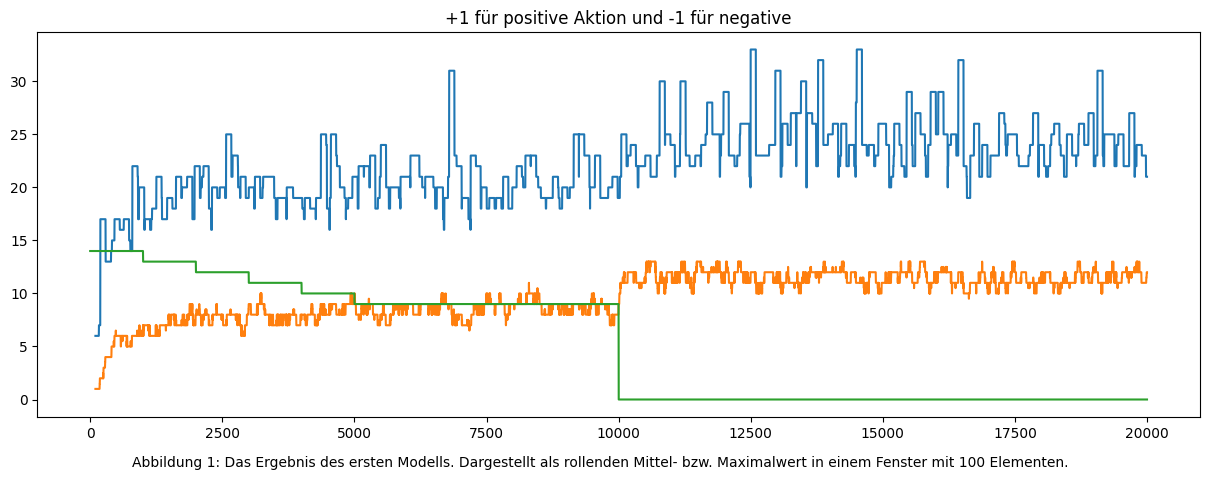

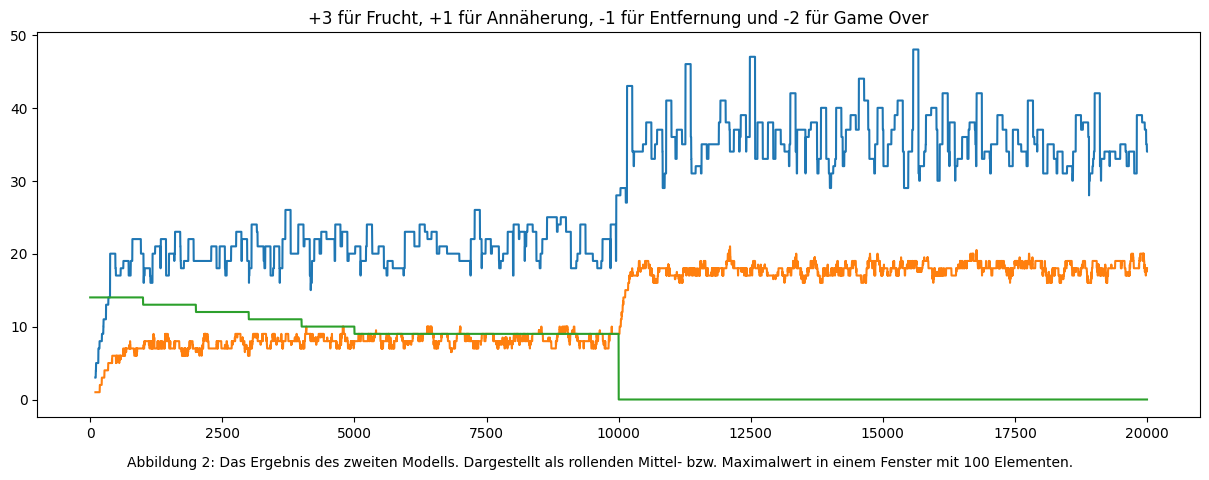

In [112]:
import pyarrow 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({'Points': ys})
df2 = pd.DataFrame({'Points': yse})
avg = df['Points'].rolling(window=100).max()
avg2 = df['Points'].rolling(window=100).median()
plt.figure(figsize=(15, 5)) 
plt.plot(avg)
plt.plot(avg2)
plt.plot(df2)
plt.title("+1 für positive Aktion und -1 für negative")

txt = 'Abbildung 1: Das Ergebnis des ersten Modells. Dargestellt als rollenden Mittel- bzw. Maximalwert in einem Fenster mit 100 Elementen.'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

df_best = pd.DataFrame({'Points': ys_best})
df2_best = pd.DataFrame({'Points': yse_best})
avg = df_best['Points'].rolling(window=100).max()
avg2 = df_best['Points'].rolling(window=100).median()
plt.figure(figsize=(15, 5)) 
plt.plot(avg)
plt.plot(avg2)
plt.plot(df2_best)
plt.title("+3 für Frucht, +1 für Annäherung, -1 für Entfernung und -2 für Game Over")
txt = 'Abbildung 2: Das Ergebnis des zweiten Modells. Dargestellt als rollenden Mittel- bzw. Maximalwert in einem Fenster mit 100 Elementen.'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

Ein wesentliches Problem des Modells besteht in der Bewertung des aktuellen Zustands. Eine Möglichkeit wäre, die gesante Umgebung als Zustand zu nutzen. Bei diesem Ansatz würden dann alle Schlangenpositionen und die Position der Frucht gespeichert. Dies könnte ein perfektes Spiel ermöglichen. Allerdings wäre dieser Ansatz (mutmaßlich) rechenaufwendiger als eine Brute-Force-Lösung. Aus diesem Grund empfielt es sich, die Anzahl der Zustände zu reduzieren, um eine möglichst realitätsnahe Abbildung zu gewärleisten. [5]

Im vorliegenden Modell wurde eine binäre Bewertung der Umgebung gewählt  
U = [0,0,0,0,0,0,0,0,0,0]  
Dabei ist  
U[0] = Die Frucht befindet sich links vom Kopf der Schlange.  
U[1] = Die Frucht befindet sich rechts vom Kopf der Schlange.  
U[2] = Die Frucht befindet sich unterhalb des Kopfs der Schlange.  
U[3] = Die Frucht befindet sich oberhalb des Kopfs der Schlange.  
U[4] = Links neben dem Schlangenkopf befindet sich ein Hindernis.  
U[5] = Über dem Schlangenkopf befindet sich ein Hindernis.   
U[6] = Rechts neben dem Schlangenkopf befindet sich ein Hindernis.  
U[7] = Unter dem Schlangenkopf befindet sich ein Hindernis.  
U[8] = Die Frucht befindet sich in einer Linie (x-Achse mit dem Kopf).  
U[9] = Die Frucht befindet sich in einer Linie (y-Achse mit dem Kopf).str(snake[k][1]) + "," + str(snake[k][1]+1))  

Eine wesentliche schwäche des Modells, ist somit, dass sehr unterschiedliche Zustände gleich repräsentiert werden. Dies ist der folgenden Abbildung zu entnehmen. Dabei führt der erste Zustand zu einem verlorenen Spiel, während der zweite Zustand kein Problem darstellt. Die Frucht wird orange, der Kopf blau und der körper schwarz dargestellt.

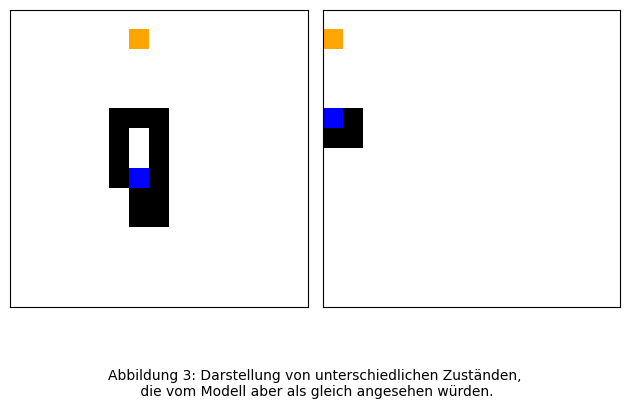

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

snake= np.zeros((15, 15))

snake[5:6, 6:7] = 2
snake[5:6, 7:8] = 2
snake[8:9, 5:6] = 2
snake[7:8, 5:6] = 2
snake[6:7, 5:6] = 2
snake[5:6, 5:6] = 2
snake[8:9, 7:8] = 2
snake[7:8, 7:8] = 2
snake[6:7, 7:8] = 2
snake[5:6, 7:8] = 2
snake[9:10, 7:8] = 2
snake[10:11, 7:8] = 2
snake[10:11, 6:7] = 2
snake[9:10, 6:7] = 2
snake[8:9, 6:7] = 1
snake[1:2, 6:7] = 3
plt.subplot(1, 2, 1)
colors = ['white',  'blue','black', 'orange']
cmap = ListedColormap(colors)


plt.imshow(snake, cmap=cmap)


plt.gca().set_facecolor('white')


plt.grid(True, which='both', color='orange', linewidth=2)


plt.xticks([])
plt.yticks([])



snake2= np.zeros((15, 15))
snake2[6:7, 0:1] = 2
snake2[5:6, 0:1] = 1
snake2[6:7, 1:2] = 2
snake2[5:6, 1:2] = 2
snake2[1:2, 0:1] = 3
plt.subplot(1, 2, 2)
plt.imshow(snake2, cmap=cmap)


plt.gca().set_facecolor('white')


plt.grid(True, which='both', color='orange', linewidth=2)

plt.xticks([])
plt.yticks([])

plt.tight_layout()

txt = 'Abbildung 3: Darstellung von unterschiedlichen Zuständen,\n die vom Modell aber als gleich angesehen würden.'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

Aus der folgenden Grafik wird ein weiteres Problem deutlich: Beim ersten Modell fällt die Minimalpunktzahl immer wieder auf null oder eins ab. Dies ändert sich zwar nach Epoche 10000. Allerdings gibt es weiterhin Spiele, die mit null Punkten enden. Da keine Situation denkbar ist, in der das Spiel zwangsläufig mit null oder einem Punkt enden muss, führt das Modell offensichtlich Züge aus, die keinen Sinn ergeben. 
Beim zweiten Modell ist eine deutlich höhere Minimalpunktzahl zu erkennen, sobald die zufälligen Züge abgeschaltet werden.

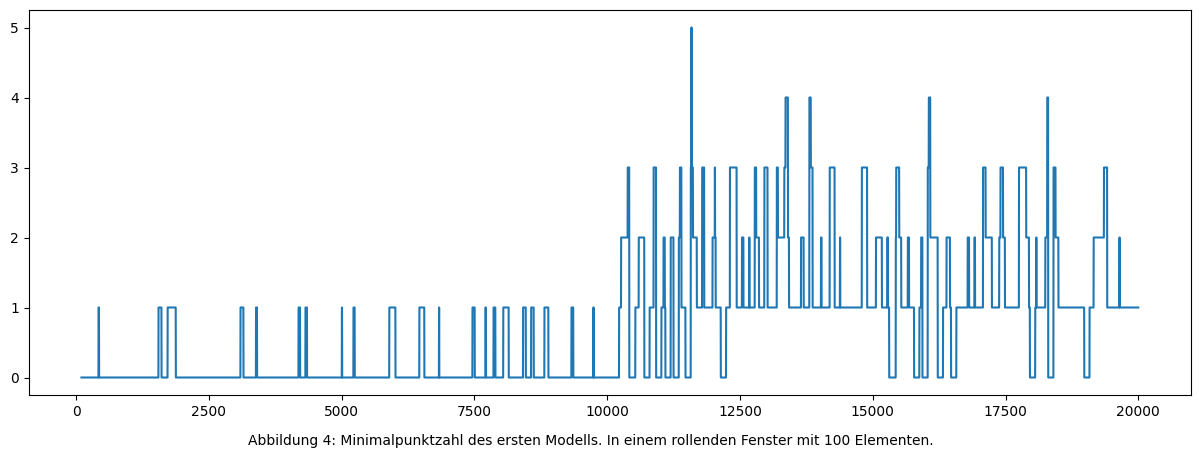

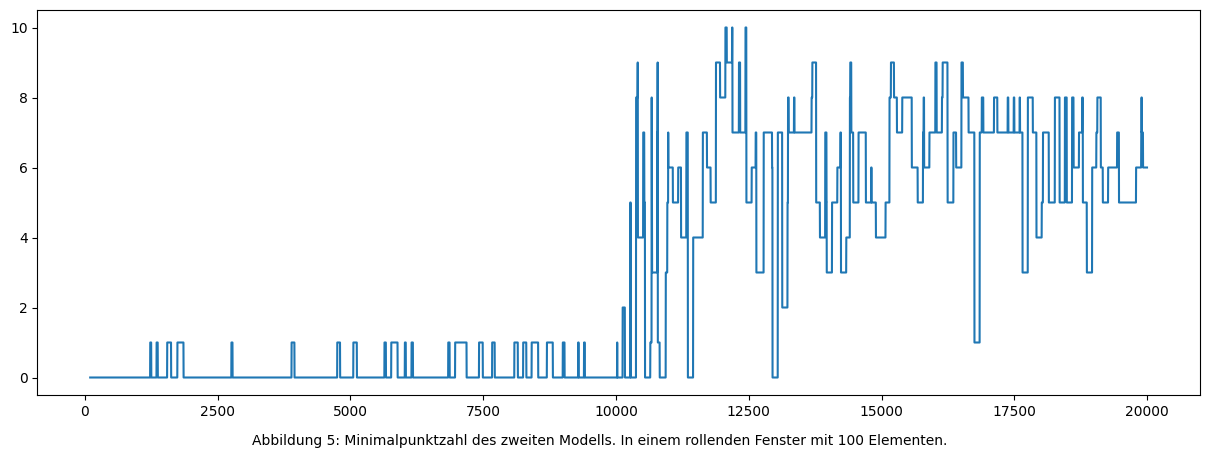

In [113]:

avg = df['Points'].rolling(window=100).min()

plt.figure(figsize=(15, 5)) 
plt.plot(avg)
txt = 'Abbildung 4: Minimalpunktzahl des ersten Modells. In einem rollenden Fenster mit 100 Elementen.'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)


plt.show()

avg = df_best['Points'].rolling(window=100).min()

plt.figure(figsize=(15, 5)) 
plt.plot(avg)

txt = 'Abbildung 5: Minimalpunktzahl des zweiten Modells. In einem rollenden Fenster mit 100 Elementen.'
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()


Die folgenden Abbildungen zeigen die Welt aus Sicht der Zustandsbewertungsfunktion. Der Schlangenkopf ist blau markiert, Hindernisse (Schlangenkörper oder Wände) sind schwarz und die Richtung, in der sich die Frucht befindet, wird orange markiert. Oberhalb jeder Grafik ist die nächste Aktion zu sehen. Es fällt auf, dass einige Aktionen ein Spielende auslösen, obwohl dies nicht nötig wäre. Eine mögliche Erklärung ist, dass ein positiver Zug einen Punkt und ein negativer Zug einen Minuspunkt ergibt. Somit ist denkbar, dass in bestimmten Situationen ein mögliches positives Ergebnis (Frucht fressen oder näher an die Frucht herantücken) das negative Ergebnis 'Game Over' überwiegt. Zunächst wird das Modell mit (1,1,-1,-1) Punkten gezeigt und dann das Modell mit (3,1,-1,-2). Während das erste Modell noch eben diese Züge ausführt, sind diese beim zweiten Modell nichtmehr zu erkennen.

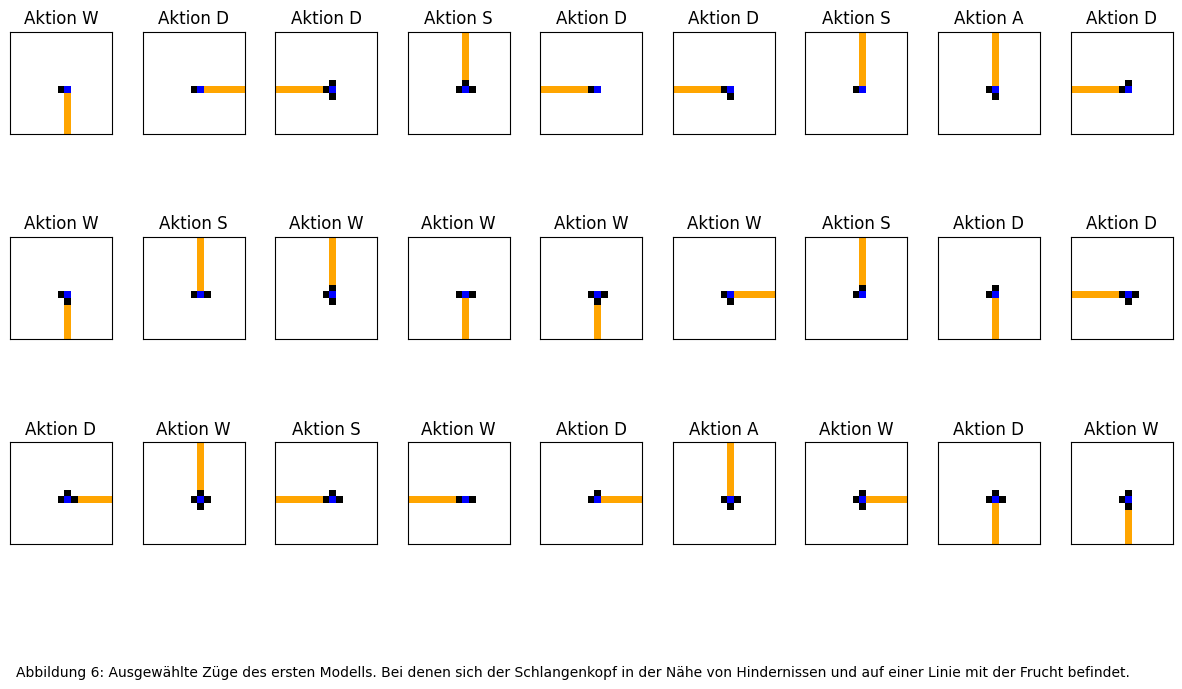

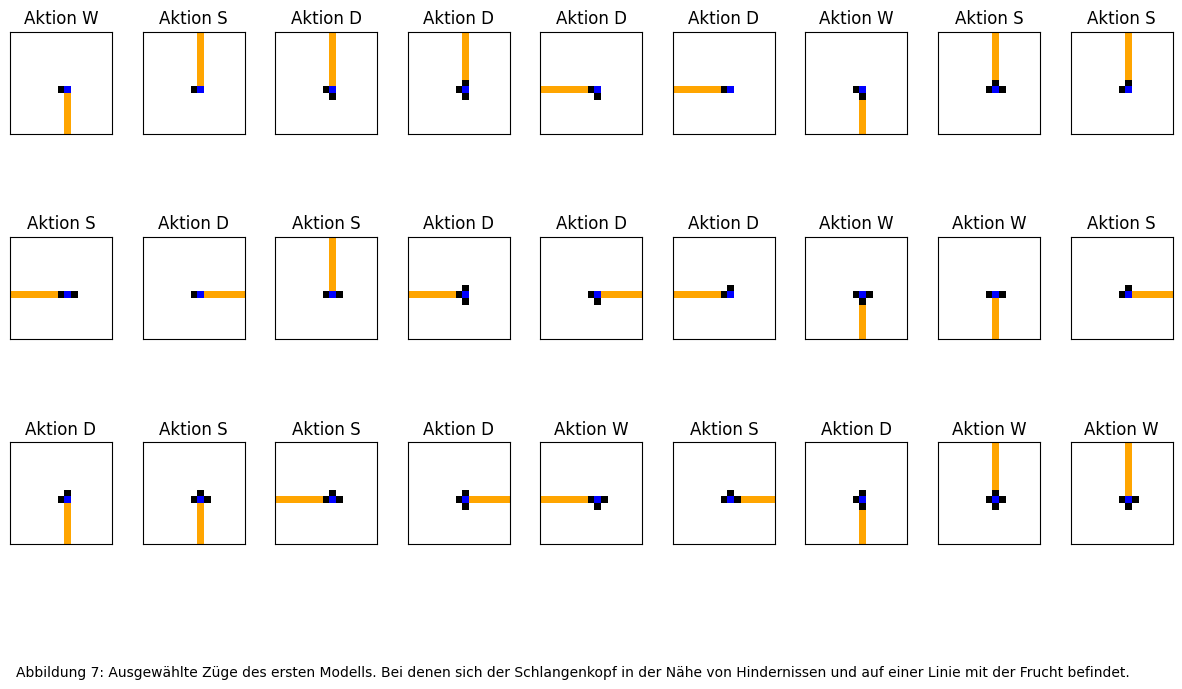

In [115]:
zzz = [ x for x in newsq.q_table if x.split(".")[4] == "1" and (x.split(".")[8] == "1" or x.split(".")[9] == "1")]
def plot_list(p_list,model,fig_text):
    colors = ['white',  'blue','black', 'orange','red']
    plot_keys = ["W","A","S","D"]
    cmap = ListedColormap(colors)
    num_cols = 9
    num_rows = len(p_list)//9
    num_subplots = len(p_list)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 8))

    for i in range(num_rows):
        for j in range(num_cols):
            idx = i * num_cols + j
            tmp = p_list[idx].split(".")

            tmp_snake = [(7,7)]
            if tmp[4] == "1": tmp_snake.append((7,6))
            if tmp[5] == "1": tmp_snake.append((6,7))
            if tmp[6] == "1": tmp_snake.append((7,8))
            if tmp[7] == "1": tmp_snake.append((8,7))
            plot = np.zeros((board_size, board_size))
            if tmp[0] == "1": 
                x_from = 0
                x_to = 8 
            else:
                x_from = 8
                x_to = board_size
            if tmp[8] == "1":
                x_from = 8
                x_to = 9
            
            if tmp[2] == "1":
                y_from = 0
                y_to = 8
            else:
                y_from = 8
                y_to = board_size
            if tmp[9] == "1":
                y_from = 8
                y_to = 9
            for x in range(x_from,x_to):
                for y in range(y_from,y_to):
                    plot[y:y+1,x:x+1] = 3
            plot[tmp_snake[0][0]+1,tmp_snake[0][1]+1] =1
            for t in tmp_snake[1:]:
                plot[t[0]+1,t[1]+1] =2
            axs[i, j].imshow(plot, cmap=cmap, vmin=0, vmax=4)
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            
            axs[i, j].set_title( "Aktion " + plot_keys[max(model.q_table[p_list[idx]], key=model.q_table[p_list[idx]].get)])
        #print(j)
        #print(newsq.q_table[j])
    plt.subplots_adjust(wspace=0.3, hspace=0)  
    plt.figtext(0.5, 0.01, fig_text, wrap=True, horizontalalignment='center', fontsize=10)
    plt.show()
    

plot_list(zzz,newsq,"Abbildung 6: Ausgewählte Züge des ersten Modells. Bei denen sich der Schlangenkopf in der Nähe von Hindernissen und auf einer Linie mit der Frucht befindet.")

k2 = [ x for x in newsq2.q_table if x.split(".")[4] == "1" and (x.split(".")[8] == "1" or x.split(".")[9] == "1")]
plot_list(k2,newsq2,"Abbildung 7: Ausgewählte Züge des ersten Modells. Bei denen sich der Schlangenkopf in der Nähe von Hindernissen und auf einer Linie mit der Frucht befindet.")

## Literatur:
[1]: "Snake (Computerspiel)", [Online] verfügbar: https://de.wikipedia.org/w/index.php?title=Snake_(Computerspiel)&oldid=236710907 , abgerufen 13.01.2023  
[2]:  Sammut, Claude; Webb, Geoffrey I., "Encyclopedia of machine learning and data mining", 2017, Springer, ISBN: 9781489976871  
[3]: Oppermann, Artem , "Deep Q-Learning", [Online] verfügbar: https://artemoppermann.com/de/deep-q-learning/ , abgerufen 13.01.2023  
[4]:  Lapan, Maxim, "Deep reinforcement learning hands-on", 2018, Packt, ISBN: 978-1-78883-424-7  
[5]:  Lee, Jason, "Teaching a computer how to play Snake with Q-Learnig", 2020, [Online] verfügbar: https://towardsdatascience.com/teaching-a-computer-how-to-play-snake-with-q-learning-93d0a316ddc0, abgerufen 15.01.2023  
[99]: https://www.pygame.org/ ,Abgerufen 10.01.2023  